# NOTEBOOK_ML📕
Prévision crédit Immobilier 

In [24]:
import mysql.connector
import pymysql
import sqlite3

In [25]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
# from transformers import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
# from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
import pickle

In [26]:
df_train=pd.read_sql(query , data_base)
# df_train=pd.read_csv(query , data_base)
# metttre le chemin la ou il se trouve

C:\Users\simplon\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [28]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="youcef" , database="loan_prediction")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction.df_train"
cur.execute(query)
tables = cur.fetchone()

# DATA

In [29]:
df_train


,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
559,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
561,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MyUnknownColumn    563 non-null    int64  
 1   Loan_ID            563 non-null    object 
 2   Gender             563 non-null    object 
 3   Married            563 non-null    object 
 4   Dependents         563 non-null    int64  
 5   Education          563 non-null    object 
 6   Self_Employed      563 non-null    object 
 7   ApplicantIncome    563 non-null    int64  
 8   CoapplicantIncome  563 non-null    float64
 9   LoanAmount         563 non-null    float64
 10  Loan_Amount_Term   563 non-null    float64
 11  Credit_History     563 non-null    float64
 12  Property_Area      563 non-null    object 
 13  Loan_Status        563 non-null    object 
dtypes: float64(4), int64(3), object(7)
memory usage: 61.7+ KB


In [31]:
df_train.head()

,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
df_clean.drop(['Loan_ID'], axis=1)

,MyUnknownColumn,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
559,609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
561,612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
df_train = df_train.drop(['Loan_ID', 'MyUnknownColumn'], axis=1)

In [37]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
558,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
559,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
561,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             563 non-null    object 
 1   Married            563 non-null    object 
 2   Dependents         563 non-null    int64  
 3   Education          563 non-null    object 
 4   Self_Employed      563 non-null    object 
 5   ApplicantIncome    563 non-null    int64  
 6   CoapplicantIncome  563 non-null    float64
 7   LoanAmount         563 non-null    float64
 8   Loan_Amount_Term   563 non-null    float64
 9   Credit_History     563 non-null    float64
 10  Property_Area      563 non-null    object 
 11  Loan_Status        563 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 52.9+ KB


In [39]:
df_train.dropna(inplace=True)

# LabelEncoder sur la Target

In [40]:
lBE = LabelEncoder()
categ = ["Loan_Status"]
df_train[categ] = df_train[categ].apply(lBE.fit_transform)
df_train


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
558,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
559,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
560,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
561,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


# ONEHOTENCODER sur les variables

In [41]:
ohe = OneHotEncoder(handle_unknown='ignore')
One_hot = pd.DataFrame(ohe.fit_transform(df_train[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]]).toarray())
One_hot.columns = ohe.get_feature_names_out(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"])
One_hot

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
559,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
560,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
561,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# CONCATENATION DU LABEL ET ONEHOT ENCODER

In [43]:
df_encoded = pd.concat([df_train, One_hot], axis=1)


In [44]:
df_encoded

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
559,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
560,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
561,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Split

In [45]:
X = df_encoded.drop(["Loan_Status"], axis=1)
y = df_encoded.Loan_Status

In [46]:
# stratified k-fold pour equilibré les données
train_test_split(y, stratify=None)

[145    1
 352    0
 270    0
 517    1
 472    1
       ..
 103    0
 488    1
 104    1
 161    1
 245    0
 Name: Loan_Status, Length: 422, dtype: int32,
 175    1
 447    0
 287    1
 181    1
 340    1
       ..
 480    1
 510    0
 126    1
 356    1
 501    1
 Name: Loan_Status, Length: 141, dtype: int32]

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Pipeline et  Preprocessing

In [48]:
numeric_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount",
                    "Loan_Amount_Term", "Credit_History"]
numeric_transformer = Pipeline(
    steps=[
        ("scaler", MinMaxScaler())]
)

categorical_features = ["Gender", "Married", "Dependents",
                        "Education", "Self_Employed", "Property_Area"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder())
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

#  LogisiticRegression

In [49]:
LogicReg = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression())]
)


In [50]:
LogicReg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', LogisticRegression())])

# Evaluation

In [51]:
print("accuracy train : %.3f"%LogicReg.score(X_train, y_train))
print("accuracy test : %.3f"%LogicReg.score(X_test , y_test))   

accuracy train : 0.813
accuracy test : 0.814


In [52]:
y_pred_LogicReg = LogicReg.predict(X_test) 

In [53]:
print(classification_report(y_test, y_pred_LogicReg))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        35
           1       0.79      1.00      0.88        78

    accuracy                           0.81       113
   macro avg       0.89      0.70      0.73       113
weighted avg       0.85      0.81      0.79       113



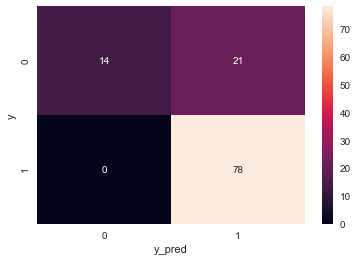

In [54]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_LogicReg)

# Learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

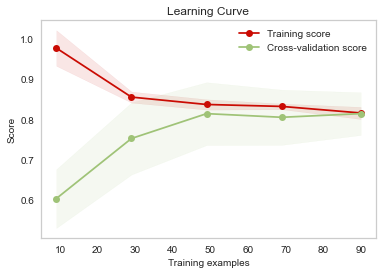

In [55]:
plot_learning_curve(LogicReg,X_test , y_test)

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

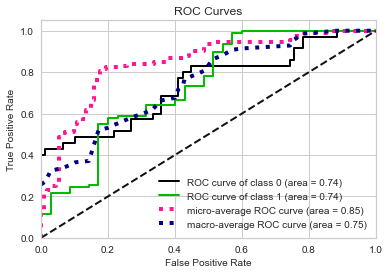

In [56]:
LogicReg.fit(X_train, y_train)
y_probas = LogicReg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# KNeighborsClassifier

In [57]:
KNC = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier",  KNeighborsClassifier())]
)

In [58]:
KNC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', KNeighborsClassifier())])

# Evaluation

In [59]:
print("accuracy train : %.3f"%KNC.score(X_train, y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.809
accuracy test : 0.735


In [60]:
y_pred_KNC = KNC.predict(X_test) 

In [61]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40        35
           1       0.74      0.94      0.83        78

    accuracy                           0.73       113
   macro avg       0.71      0.61      0.61       113
weighted avg       0.72      0.73      0.70       113



# matrice confusion

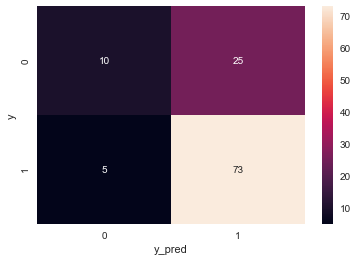

In [62]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

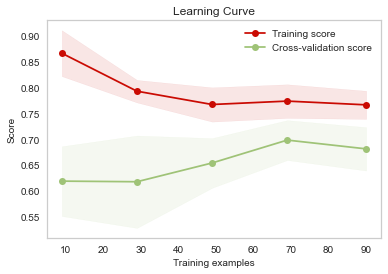

In [63]:
plot_learning_curve(KNC,X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

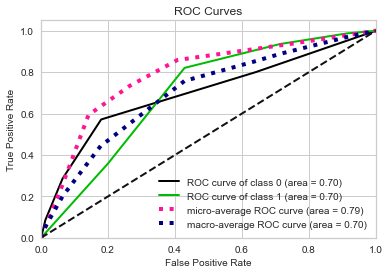

In [64]:
KNC.fit(X_train, y_train) 
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# DecisionTree

In [65]:
DT = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier())]
)


In [66]:
DT.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', DecisionTreeClassifier())])

# Evaluation

In [67]:
print("accuracy train : %.3f"%DT.score(X_train, y_train))
print("accuracy test : %.3f"%DT.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.717


In [68]:
y_pred_DT = DT.predict(X_test) 

In [69]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        35
           1       0.77      0.83      0.80        78

    accuracy                           0.72       113
   macro avg       0.66      0.65      0.65       113
weighted avg       0.71      0.72      0.71       113



# matrice confusion

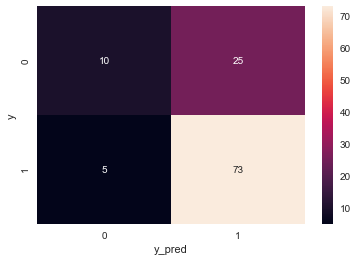

In [70]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

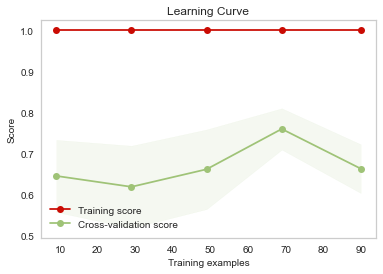

In [71]:
plot_learning_curve(DT, X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

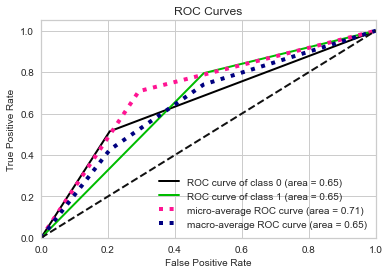

In [72]:
DT.fit(X_train, y_train)
y_probas = DT.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# RandomForestClassifier

In [73]:
RFC = GBC = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier())]
)

In [74]:
RFC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier())])

In [75]:
print("accuracy train : %.3f"%RFC.score(X_train, y_train))
print("accuracy test : %.3f"%RFC.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.796


In [76]:
y_pred_RFC = RFC.predict(X_test) 

In [77]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.75      0.51      0.61        35
           1       0.81      0.92      0.86        78

    accuracy                           0.80       113
   macro avg       0.78      0.72      0.74       113
weighted avg       0.79      0.80      0.78       113



# matrice confusion

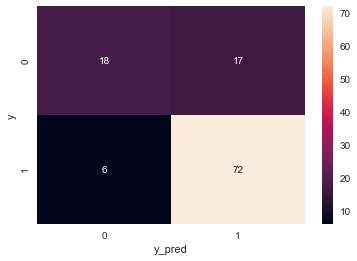

In [78]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_RFC)

# learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

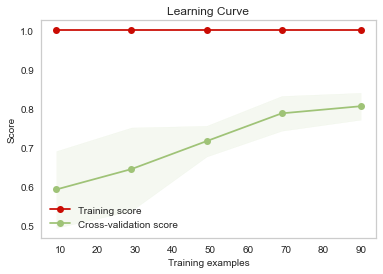

In [79]:
plot_learning_curve(RFC, X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

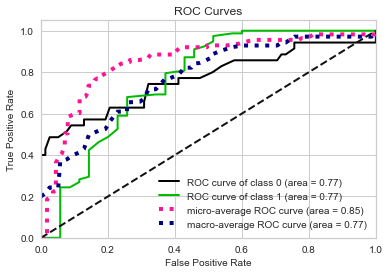

In [80]:
RFC.fit(X_train, y_train)
y_probas = RFC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# GradientBoostingClassifier

In [81]:
GBC = GBC = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier())]
)

In [82]:
GBC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', GradientBoostingClassifier())])

In [83]:
print("accuracy train : %.3f"%GBC.score(X_train, y_train))
print("accuracy test : %.3f"%GBC.score(X_test , y_test))

accuracy train : 0.920
accuracy test : 0.770


In [84]:
y_pred_GBC = GBC.predict(X_test) 

In [85]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54        35
           1       0.78      0.92      0.85        78

    accuracy                           0.77       113
   macro avg       0.75      0.68      0.69       113
weighted avg       0.76      0.77      0.75       113



# matrice confusion

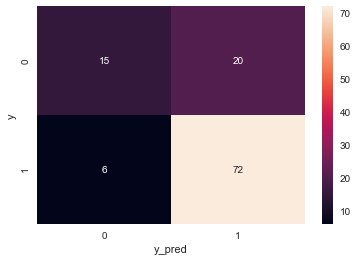

In [86]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_GBC)

# learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

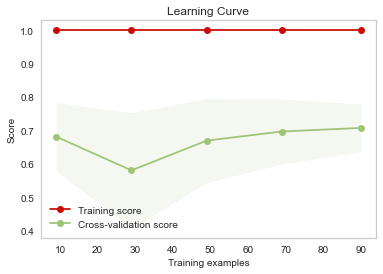

In [87]:
plot_learning_curve(GBC,X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

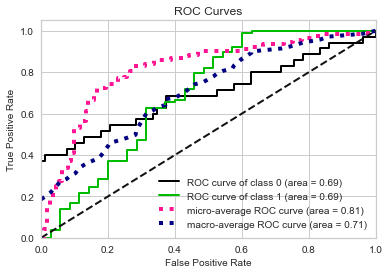

In [88]:
GBC.fit(X_train, y_train)
y_probas = GBC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [89]:
print(X_test)

     Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
516  Female     Yes           1      Graduate           Yes            19484   
210    Male      No           0      Graduate           Yes             6400   
456    Male     Yes           0  Not Graduate            No             2600   
427    Male      No           0      Graduate            No             4166   
165    Male     Yes           1      Graduate            No             6400   
..      ...     ...         ...           ...           ...              ...   
558    Male     Yes           0      Graduate            No             3232   
285    Male     Yes           2  Not Graduate            No             7667   
465    Male     Yes           2      Graduate            No             3510   
422    Male      No           2      Graduate            No             4354   
556    Male     Yes           1      Graduate            No             3400   

     CoapplicantIncome  LoanAmount  Loa

In [90]:
prediction = GBC.predict(X_test)

In [91]:
print(prediction)

[0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1]


In [92]:
## TAken data from the dataset
t = GBC.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

ValueError: X has 11 features, but ColumnTransformer is expecting 25 features as input.

In [ ]:
print(t)


In [ ]:
y_pred_GBC

In [ ]:
X_test

In [ ]:
# model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
# classify(model, X, y)

In [ ]:
# faire une prevision 
# profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
# RFC.predict(profil_test)

# Enregsiter le modele

# PICKLE

In [ ]:
import pickle


In [ ]:
file = 'model_2.pkl'
with open(file, 'wb') as f:
    pickle.dump(GBC, f)


In [ ]:
# file = '../models/model_2.pkl'
# with open('../models/model_2.pkl', 'wb') as f:
#     pickle.dump(GBC, f) 

In [ ]:
# now you can save it to a file
file = './Model/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(KNC, f)

In [ ]:
# enregistrer le modèle
# pickle.dump(GBC,open('model.pkl','wb'))

In [ ]:
# import pickle
# # now you can save it to a file
# file = './model_pkl.pickle.pkl'
# with open('model_pkl.pickle', 'wb') as file:
#     pickle.dump(svc, f)

In [ ]:
# pickle_out = open("classifier.pkl", mode = 'wb')
# pickle.dump(model, pickle_out)
# # pickle_out.close()

In [ ]:
# filename="model.pkl"


In [ ]:
# import pickle
# with open(filename, 'wb') as f:
#     pickle.dump(RFC, f)

In [ ]:
# with open(filename, 'rb') as f:
#     m = pickle.load(f)

In [ ]:
# Export pipeline as pickle file
# with open("model.pkl", "wb") as file:
#     pickle.dump(pipe_model, file)

# # Load pipeline from pickle file
# my_pipeline = pickle.load(open("model.pkl","rb"))

# # Et on test le score
# my_pipeline.score(X_test, y_test)

In [ ]:
# import pickle

# with open("model.pkl", "wb") as file:
#     pickle.dump(GBC, file)

In [ ]:
# with open(file, 'rb') as f:
#     k = pickle.load(f)

In [ ]:
# K = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
# print(K)

# MONITORING

In [ ]:
from sqlalchemy import column
from sqlalchemy import create_engine
# sqlalchemy.py 
from sqlalchemy import *


In [ ]:
engine=create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format
                     (host="localhost",user="root",pw="youcef",db="loan_prediction"))
conne=engine.connect()
X_test.to_sql('ml_pred',conne,if_exists='replace',index = False)

In [ ]:
import wandb
import random
import time
import wandb
from wandb import AlertLevel

In [ ]:
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "ML",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"recall": recall, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

In [95]:
threshold = 0.80

if acc < threshold:
    wandb.alert(
        title="Low accuracy", 
        text=f"Recall {recall} is below the acceptable theshold {threshold}",
        level=AlertLevel.WARN,
        wait_duration=300
    )

NameError: name 'acc' is not defined

In [97]:
# acc = 0.20
if acc < threshold:
    wandb.alert(
        title="Low accuracy", 
        text=f"Recall {recall} is below the acceptable theshold {threshold}",
        level=AlertLevel.WARN,
        wait_duration=300
    )

NameError: name 'acc' is not defined

In [98]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

NameError: name 'wandb' is not defined

In [ ]:
# wandb.init(project="offline-demo")

In [ ]:
# for i in range(100):
#   wandb.log({"accuracy": i})

In [ ]:
# for step in range(60):
#     wandb.log({'acc': random.random(), 'loss': random.random()})
#     time.sleep(1)

In [99]:
wandb.alert(
    title="Low accuracy", 
    text=f"Recall {acc} is below the acceptable threshold {thresh}"
)

NameError: name 'wandb' is not defined

In [ ]:
# wandb.log({"loss": loss})

# # Optional
# wandb.watch(model)